In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile, os
local_zip = '/content/drive/MyDrive/gambar_buwung.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar Albatross kaki hitam    :', len(os.listdir('gambar_buwung/001.Black_footed_Albatross/')))
print('Jumlah gambar Albatross kaki hitam    :', len(os.listdir('gambar_buwung/002.Laysan_Albatross/')))
print('Jumlah gambar Albatross kaki hitam    :', len(os.listdir('gambar_buwung/003.Sooty_Albatross/')))
print('Jumlah gambar Albatross kaki hitam    :', len(os.listdir('gambar_buwung/004.Groove_billed_Ani/')))
print('Jumlah gambar Albatross kaki hitam    :', len(os.listdir('gambar_buwung/005.Crested_Auklet/')))
print('Jumlah gambar Albatross kaki hitam    :', len(os.listdir('gambar_buwung/006.Least_Auklet/')))


Jumlah Data Train Tiap Kelas
Jumlah gambar Albatross kaki hitam    : 36
Jumlah gambar Albatross kaki hitam    : 26
Jumlah gambar Albatross kaki hitam    : 26
Jumlah gambar Albatross kaki hitam    : 35
Jumlah gambar Albatross kaki hitam    : 25
Jumlah gambar Albatross kaki hitam    : 28


In [ ]:
os.mkdir('/tmp/s/')
os.mkdir('/tmp/s/train/')
os.mkdir('/tmp/s/val/')
os.mkdir('/tmp/s/train/001.Black_footed_Albatross/')
os.mkdir('/tmp/s/val/001.Black_footed_Albatross/')
os.mkdir('/tmp/s/train/002.Laysan_Albatross/')
os.mkdir('/tmp/s/val/002.Laysan_Albatross/')
os.mkdir('/tmp/s/train/003.Sooty_Albatross/')
os.mkdir('/tmp/s/val/003.Sooty_Albatross/')
os.mkdir('/tmp/s/train/004.Groove_billed_Ani/')
os.mkdir('/tmp/s/val/004.Groove_billed_Ani/')
os.mkdir('/tmp/s/train/005.Crested_Auklet/')
os.mkdir('/tmp/s/val/005.Crested_Auklet/')
os.mkdir('/tmp/s/train/006.Least_Auklet/')
os.mkdir('/tmp/s/val/006.Least_Auklet/')

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(train_ratio * total_size)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.8

#Pembagian Training dan Validasi

source_00 = 'gambar_buwung/001.Black_footed_Albatross/'
train_00 = '/tmp/s/train/001.Black_footed_Albatross/'
val_00 = '/tmp/s/val/001.Black_footed_Albatross/'
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = 'gambar_buwung/002.Laysan_Albatross/'
train_01 = '/tmp/s/train/002.Laysan_Albatross/'
val_01 = '/tmp/s/val/002.Laysan_Albatross/'
train_val_split(source_01, train_01, val_01, train_ratio)

source_02 = 'gambar_buwung/003.Sooty_Albatross/'
train_02 = '/tmp/s/train/003.Sooty_Albatross/'
val_02 = '/tmp/s/val/003.Sooty_Albatross/'
train_val_split(source_02, train_02, val_02, train_ratio)

source_03 = 'gambar_buwung/004.Groove_billed_Ani/'
train_03 = '/tmp/s/train/004.Groove_billed_Ani/'
val_03 = '/tmp/s/val/004.Groove_billed_Ani/'
train_val_split(source_03, train_03, val_03, train_ratio)

source_04 = 'gambar_buwung/005.Crested_Auklet/'
train_04 = '/tmp/s/train/005.Crested_Auklet/'
val_04 = '/tmp/s/val/005.Crested_Auklet/'
train_val_split(source_04, train_04, val_04, train_ratio)

source_05 = 'gambar_buwung/006.Least_Auklet/'
train_05 = '/tmp/s/train/006.Least_Auklet/'
val_05 = '/tmp/s/val/006.Least_Auklet/'
train_val_split(source_05, train_05, val_05, train_ratio)

In [ ]:
print('Jumlah All gambar Black_footed_Albatross  :', len(os.listdir('gambar_buwung/001.Black_footed_Albatross/')))
print('Jumlah Train Black_footed_Albatross   :', len(os.listdir('/tmp/s/train/001.Black_footed_Albatross/')))
print('Jumlah Val Black_footed_Albatross     :', len(os.listdir('/tmp/s/val/001.Black_footed_Albatross/')))

Jumlah All gambar Black_footed_Albatross  : 36
Jumlah Train Black_footed_Albatross   : 28
Jumlah Val Black_footed_Albatross     : 8


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
                  rescale = 1./255.,
                  rotation_range = 30,
                  horizontal_flip = True,
                  shear_range = 0.3,
                  fill_mode = 'nearest',
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  zoom_range = 0.1
)

val_datagen = ImageDataGenerator(
                rescale = 1./255.,
                rotation_range = 30,
                horizontal_flip = True,
                shear_range = 0.3,
                fill_mode = 'nearest',
                width_shift_range = 0.2,
                height_shift_range = 0.2,
                zoom_range = 0.1
)

In [ ]:
train_dir = '/tmp/s/train/'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 3,
    class_mode = 'categorical'
)

val_dir = '/tmp/s/val/'
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150),
    batch_size = 3,
    class_mode = 'categorical'
)

Found 138 images belonging to 6 classes.
Found 38 images belonging to 6 classes.


In [ ]:
# callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(200, activation = 'relu'),
          tf.keras.layers.Dropout(0.3,seed=112),
          tf.keras.layers.Dense(500, activation = 'relu'),
          tf.keras.layers.Dropout(0.5,seed=112),
          tf.keras.layers.Dense(6, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
            train_generator,
            steps_per_epoch = 20,
            epochs = 5000,
            validation_data = val_generator,
            validation_steps = 5,
            verbose = 1,
            callbacks = [callbacks]
)

Epoch 1/5000
20/20 [==============================] - 5s 183ms/step - loss: 1.8745 - accuracy: 0.1167 - val_loss: 1.7939 - val_accuracy: 0.2000
Epoch 2/5000
20/20 [==============================] - 3s 174ms/step - loss: 1.7964 - accuracy: 0.2500 - val_loss: 1.7908 - val_accuracy: 0.2667
Epoch 3/5000
20/20 [==============================] - 3s 171ms/step - loss: 1.7909 - accuracy: 0.2500 - val_loss: 1.8191 - val_accuracy: 0.0667
Epoch 4/5000
20/20 [==============================] - 3s 168ms/step - loss: 1.7958 - accuracy: 0.2000 - val_loss: 1.7875 - val_accuracy: 0.1333
Epoch 5/5000
20/20 [==============================] - 3s 170ms/step - loss: 1.8258 - accuracy: 0.1833 - val_loss: 1.7747 - val_accuracy: 0.2000
Epoch 6/5000
20/20 [==============================] - 3s 169ms/step - loss: 1.7783 - accuracy: 0.1833 - val_loss: 1.8831 - val_accuracy: 0.1333
Epoch 7/5000
20/20 [==============================] - 3s 168ms/step - loss: 1.7774 - accuracy: 0.2500 - val_loss: 1.6950 - val_accuracy:

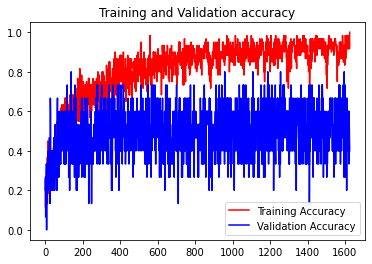

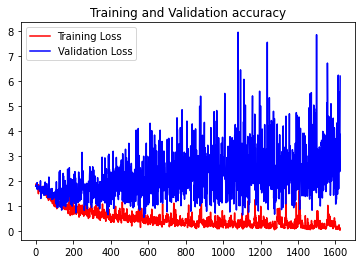

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation accuracy')
plt.legend(loc = 'best')
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir('gambar_buwung/')

  for j in range(42):
    if classes[0][j] == 1. :
      print('This image belongs to class', class_list[j])
      break